# k-folds is a method to evaluate the trained model
    This helps us to evaluate the accuracy and variance of the model
    
    Basically when a model has differnt accuracy values when we test it against different test set
    
    If there is a high variance then the trained model is jush a garbage in-out model
    
    To overcome this we use k-folds 
    
    In k-folds we split the training data into k folds where k-1 folds are used to train the model and 1 fold used to test the trained model tis is done for k times
    
    And by taking the accuracy for each model we can calculate mean accuraccy and standard deviation(also variance)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
%matplotlib inline

In [3]:
social_data = pd.read_csv('Social_Network_Ads.csv')

In [4]:
social_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
social_data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
# seperating the data and label

X = social_data[['Age','EstimatedSalary']]

Y = social_data['Purchased'].values

In [7]:
# Stardardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [8]:
X = sc.fit_transform(X)

In [9]:
#Spliting the data
from sklearn.model_selection import train_test_split

Xtrain , Xtest , ytrain , ytest = train_test_split(X,Y,test_size = 0.25,random_state=0)

In [10]:
# Creating a gaussian kernel 


from sklearn.svm import SVC

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [11]:
classifier = SVC(kernel='rbf' , random_state=0)

In [12]:
classifier.fit(Xtrain,ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [13]:
ypred = classifier.predict(Xtest)

In [14]:
from sklearn.metrics import confusion_matrix


In [15]:
confusion_matrix(ytest , ypred)

array([[64,  4],
       [ 3, 29]])

In [16]:
#k-folds cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier , X = Xtrain , y = ytrain , cv = 10)
# estimator is the trained model
#cv is the k in k-folds

In [19]:
accuracies

array([0.8       , 0.96666667, 0.8       , 0.96666667, 0.86666667,
       0.83333333, 0.9       , 0.93333333, 1.        , 0.93333333])

In [20]:
accuracies.mean()

0.9

In [21]:
accuracies.std()

0.0683130051063973

So the model has an average accuracy of 90% with a standard deviaton of 6% i.e accuracy can oscillate between 84% to 96%

A model is said to be accurate with max mean accuracy and min standard deviation
A min std implies that the vaiance is low

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


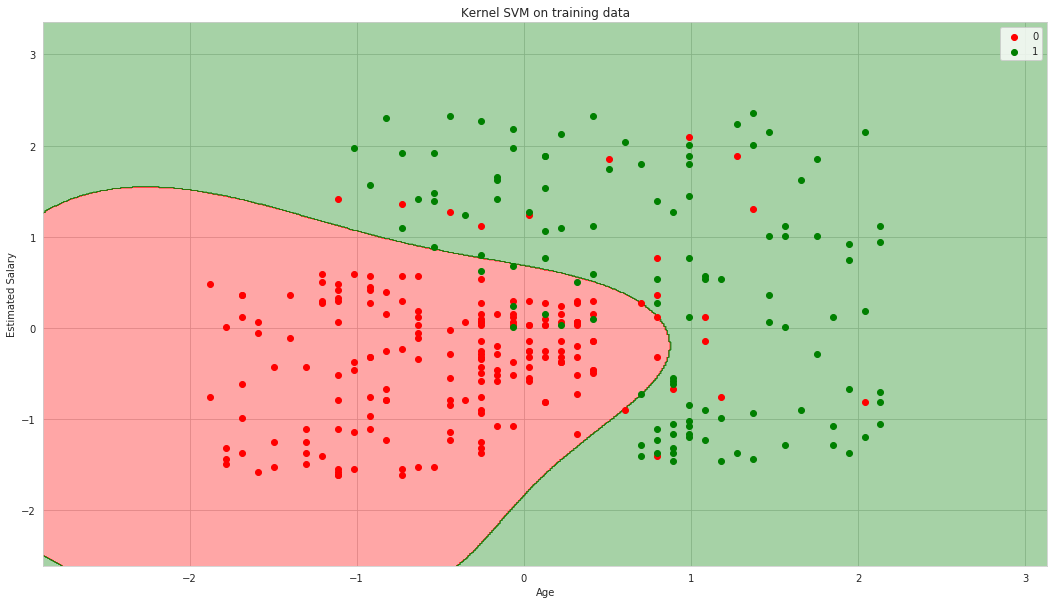

In [17]:
# Visualizing Logistic Regression On Training Data

sns.set_style('whitegrid')
plt.figure(figsize = (18,10))
from matplotlib.colors import ListedColormap

X_set , y_set = Xtrain , ytrain

#-------------------

X1 , X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1 , stop = X_set[:,0].max() + 1 , step = 0.01) ,
                      np.arange(start = X_set[:,1].min() - 1 , stop = X_set[:,1].max() + 1 , step = 0.01))

# meshgrid converts a 1D array into a matrix conining the rectangular coordinates for that points in the array
# and here we are taking arange two times because we have two parameters deciding the value

#-------------------
plt.contourf(X1 ,X2 , classifier.predict(np.array([X1.ravel() , X2.ravel()]).T).reshape(X1.shape) , alpha = 0.35,
            cmap = ListedColormap(('red' , 'green')))

# contour fill plot is used to plot contours and fill the regions having same value with some color
# ravel converts a n dim matrix into an 1D array

#------------------
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

#--------------------

for i , j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j , 0] , X_set[y_set == j , 1] , c = ListedColormap(('red','green'))(i) , label = j)

# enumerate returns the a set of labels and for each unique value in the array returned by unique()
# here in this case j will be 0 ,1 i.e the unique values and i will be 0,1 i.e the label assigned to this values

plt.title('Kernel SVM on training data')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


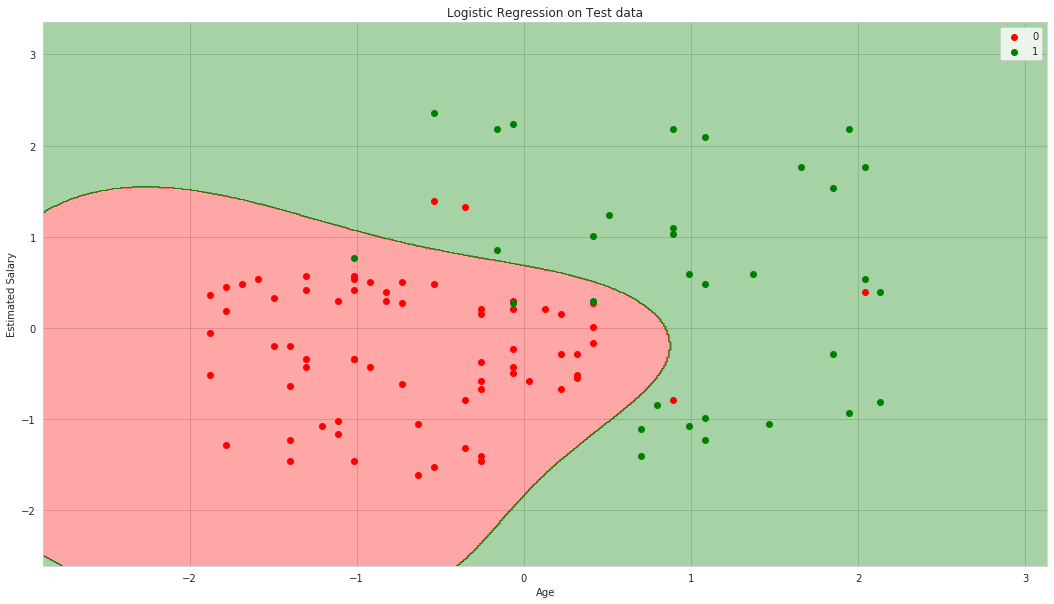

In [18]:
# Visualizing Logistic Regression On Test Data

sns.set_style('whitegrid')
plt.figure(figsize = (18,10))
from matplotlib.colors import ListedColormap

X_set , y_set = Xtest , ytest

#-------------------

X1 , X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1 , stop = X_set[:,0].max() + 1 , step = 0.01) ,
                      np.arange(start = X_set[:,1].min() - 1 , stop = X_set[:,1].max() + 1 , step = 0.01))

# meshgrid converts a 1D array into a matrix conining the rectangular coordinates for that points in the array
# and here we are taking arange two times because we have two parameters deciding the value

#-------------------
plt.contourf(X1 ,X2 , classifier.predict(np.array([X1.ravel() , X2.ravel()]).T).reshape(X1.shape) , alpha = 0.35,
            cmap = ListedColormap(('red' , 'green')))

# the classifier here predixts the values and plots them which appers to us as the coloured regions
# contour fill plot is used to plot contours and fill the regions having same value with some color
# ravel converts a n dim matrix into an 1D array

#------------------
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

#--------------------

for i , j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j , 0] , X_set[y_set == j , 1] , c = ListedColormap(('red','green'))(i) , label = j)

# enumerate returns the a set of labels and for each unique value in the array returned by unique()
# here in this case j will be 0 ,1 i.e the unique values and i will be 0,1 i.e the label assigned to this values

plt.title('Logistic Regression on Test data')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()